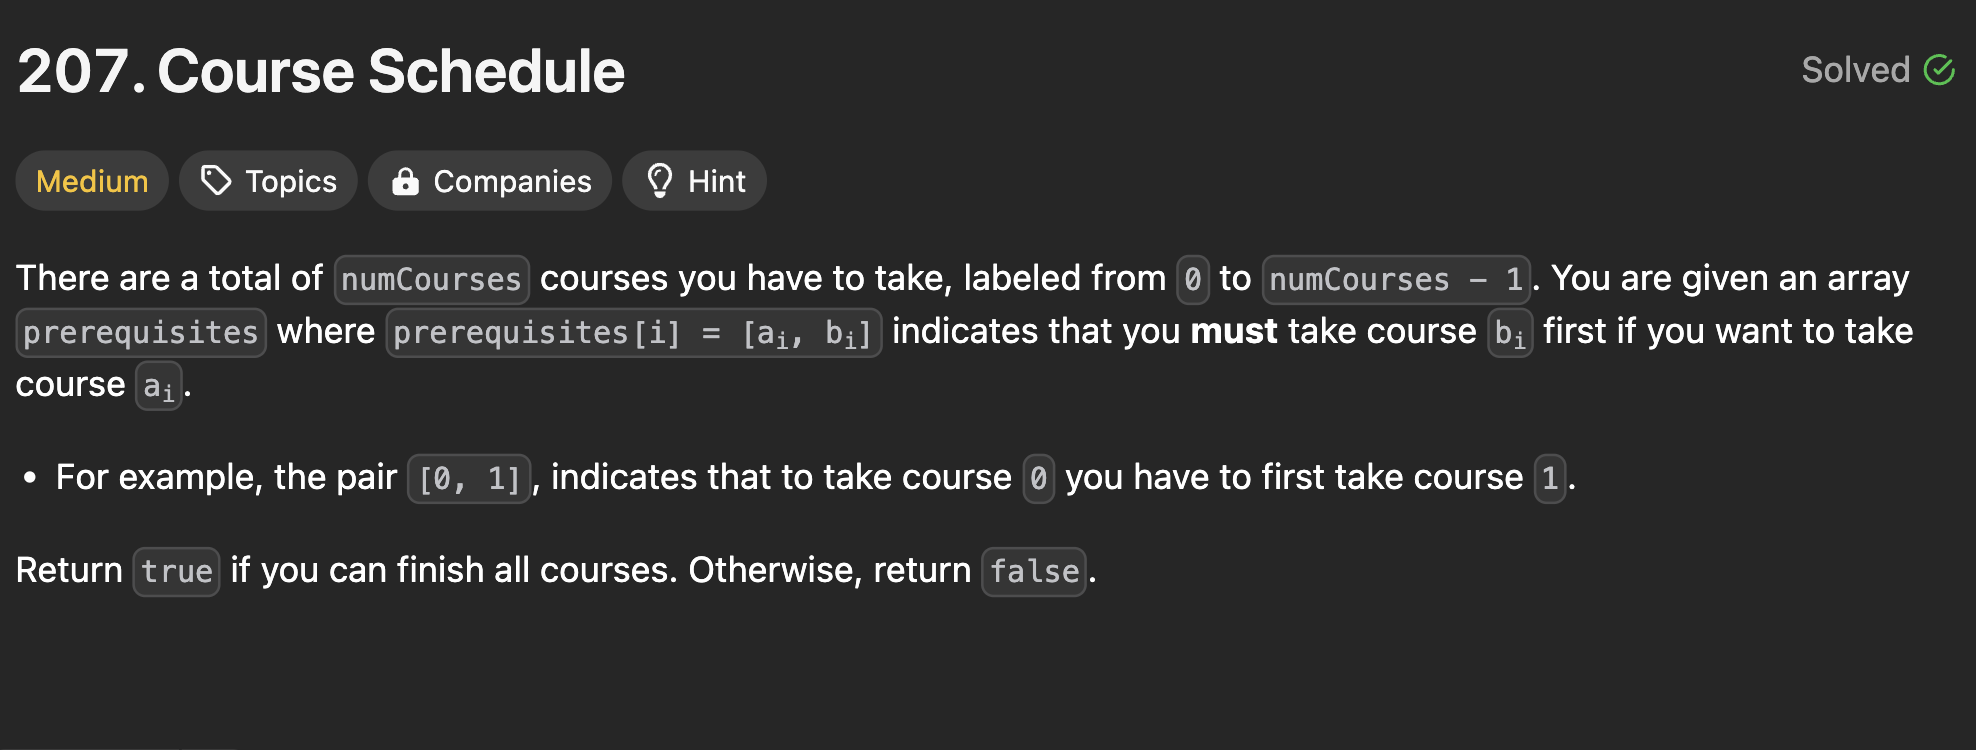

In [ ]:
from collections import defaultdict
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        # Dictionary for all the prerequisites of a course
        connections = defaultdict(list)
        for val, key in prerequisites:
            connections[key].append(val)
        
        # Set of nodes that I already checked and I know they don't have loops
        safeNodes = set()

        def dfs(node, seen=set()):
            nonlocal connections, safeNodes
            # Is this node already approved
            if node in safeNodes:
                return True
            # Did I looped back to it
            if node in seen:
                return False
            seen.add(node)
            # Check its prerequisites
            for link in connections[node]:
                if dfs(link) == False:
                    return False
            safeNodes.add(node)
            return True

        for _, node in prerequisites:
            # If there is one loop then return False
            if dfs(node) == False:
                return False
        return True